In [ ]:
import os
# import Google Drive 套件
from google.colab import drive
# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

os.chdir('./gdrive/MyDrive/成大/soa3/img-learning/course/HW2')      # 檔案目錄

In [1]:
import utils
from PIL import Image
import numpy as np
import os
import importlib
import time

hii


# 輸入資料

In [2]:
paths = os.listdir('./data/')
for i in range(len(paths)):
    paths[i] = './data/' + paths[i]
paths

['./data/1.jpg',
 './data/baboon.bmp',
 './data/F16.raw',
 './data/flower.raw',
 './data/lena.raw',
 './data/Noisy.raw',
 './data/peppers.raw',
 './data/test']

# 測試

# global histogram

hii


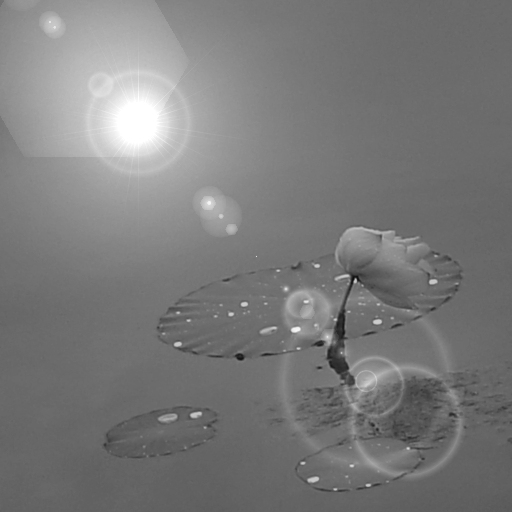

In [45]:
importlib.reload(utils)
filters = utils.Pic_Filters()
img = Image.open('./data/test/flower.png')
img

In [46]:
importlib.reload(utils)
filters = utils.Pic_Filters()

hii


In [47]:
inputs = np.array(img).astype('uint8')
t = filters.global_histogram_equalization(inputs)
Image.fromarray(t[0]).save('./data/result/lena_result.png')

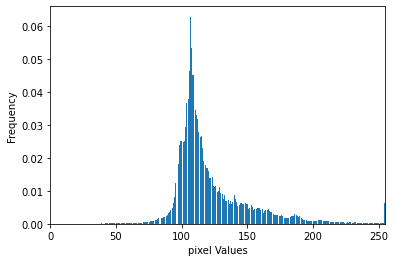

In [48]:
import matplotlib.pyplot as plt
c = t[1]
data = []
for i in range(len(c)):
    a = [i] * c[i]
    data = data + a

fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins='auto', density=True)
ax.set_xlabel("pixel Values")
ax.set_ylabel("Frequency")
ax.set_xlim([0, 255])
fig.savefig('./data/result/hist_flower.png')
plt.show()

# local histogram

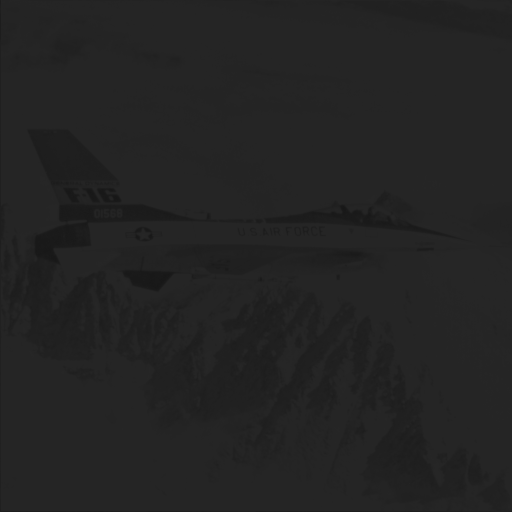

In [38]:
img = Image.open('./data/test/F16_down.png')
img

In [34]:
importlib.reload(utils)
filters = utils.Pic_Filters()

hii


In [42]:
t = time.time()
inputs = np.array(img).astype('float')
outputs = filters.local_histogram_equalization(inputs, kernel=51, k0=1., k1=0.1, k2=1.5, E=3)
print(time.time() - t)

15.527460813522339


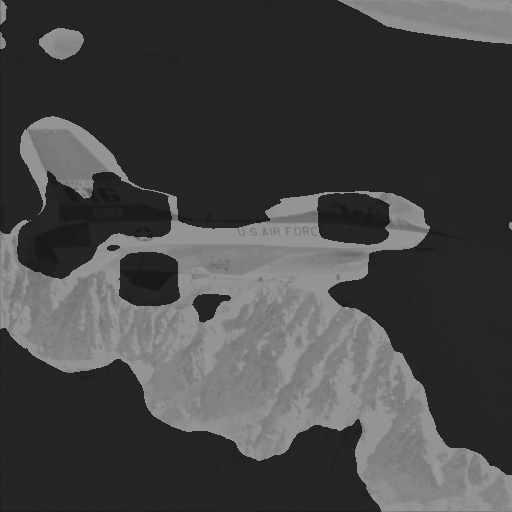

In [43]:
Image.fromarray(outputs[0].astype('uint8'))

In [44]:
Image.fromarray(outputs[0].astype('uint8')).save('./data/result/problem1/local_F16.png')

# Histogram matching

In [60]:
importlib.reload(utils)
imgArray = Image.open('./data/test/flower.png')
imgArray = np.array(imgArray)

filters = utils.Pic_Filters()
img = Image.open('./data/test/baboon.png')
img = np.array(img)

hii


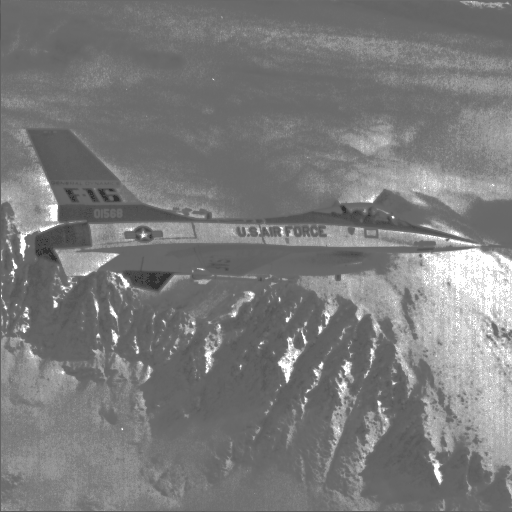

In [64]:
img = np.array(img)
outputs = filters.histogram_matching(img, imgArray)
Image.fromarray(outputs)#.save('./data/result/problem1/F16_hisMatching.png')

In [62]:
h = filters.extract_histogram(outputs)
data = []
for i in range(len(h)):
    a = [i] * h[i]
    data = data + a


(0.0, 255.0)

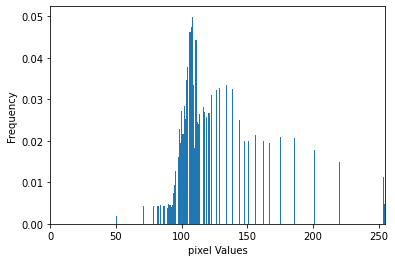

In [65]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins='auto', density=True)
ax.set_xlabel("pixel Values")
ax.set_ylabel("Frequency")
ax.set_xlim([0, 255])

# convolution filters

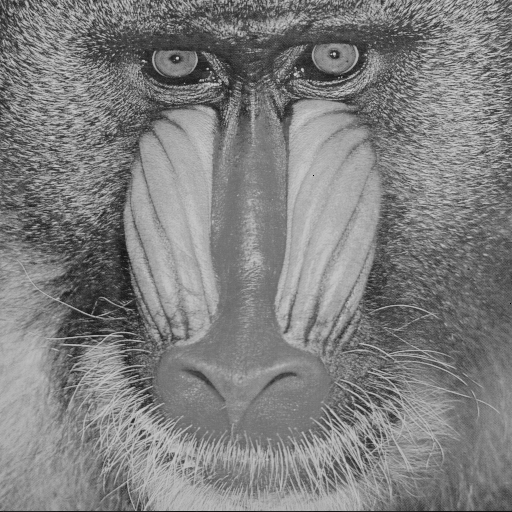

In [121]:
img = Image.open('./data/test/baboon.png')
imgA = np.array(img)
img

hii


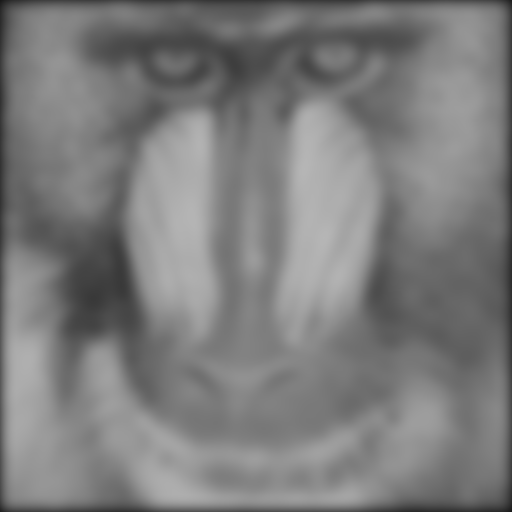

In [112]:
img = Image.open('./data/test/baboon.png')
imgA = np.array(img)

importlib.reload(utils)
filters = utils.Pic_Filters()
gaussianF = filters.gaussian_filter(33, 50)
outputs = filters.conv(gaussianF, imgA)
Image.fromarray(outputs.astype('uint8'))#.save('./data/result/problem2/gaussian/lena_K33.png')

In [140]:
img = Image.open('./data/test/lena.png')
imgA = np.array(img)

importlib.reload(utils)
filters = utils.Pic_Filters()
averageF = filters.average_filter(33)
outputs = filters.conv(averageF, imgA)
Image.fromarray(outputs.astype('uint8')).save('./data/result/problem2/average/lena_K33.png')

hii


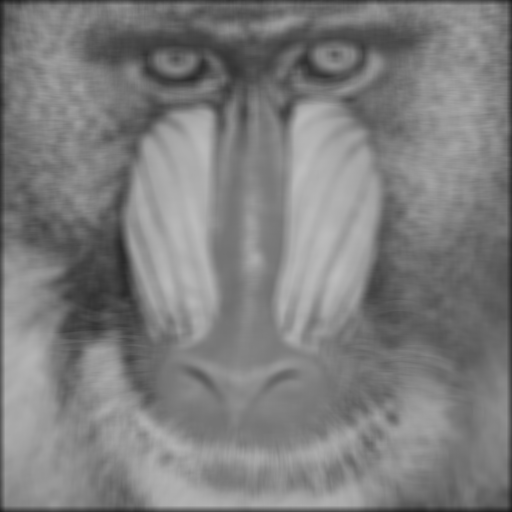

In [108]:
outputs = filters.conv(averageF, imgA)
Image.fromarray(outputs.astype('uint8'))

In [78]:
img = Image.open('./data/test/lena.png')
imgA = np.array(img)

importlib.reload(utils)
filters = utils.Pic_Filters()
laplacianF = filters.laplacian_filter(7)
outputs = filters.conv(laplacianF, imgA)
Image.fromarray(outputs.astype('uint8')).save('./data/result/problem2/laplacian/lena_K7.png')

hii


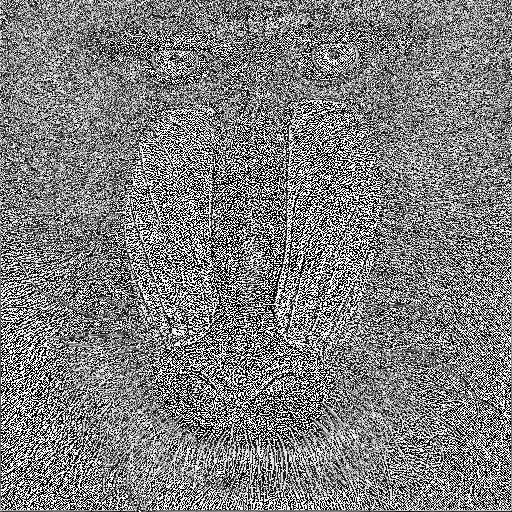

In [69]:
outputs = filters.conv(laplacianF, imgA)
Image.fromarray(outputs.astype('uint8'))

In [107]:
img = Image.open('./data/test/lena.png')
imgA = np.array(img)

importlib.reload(utils)
filters = utils.Pic_Filters()
sobelF = filters.sobel_filter(7, dir=2)
outputs = filters.conv(sobelF, imgA)
Image.fromarray(outputs.astype('uint8')).save('./data/result/problem2/sobel/lena_k7_dir2.png')

hii


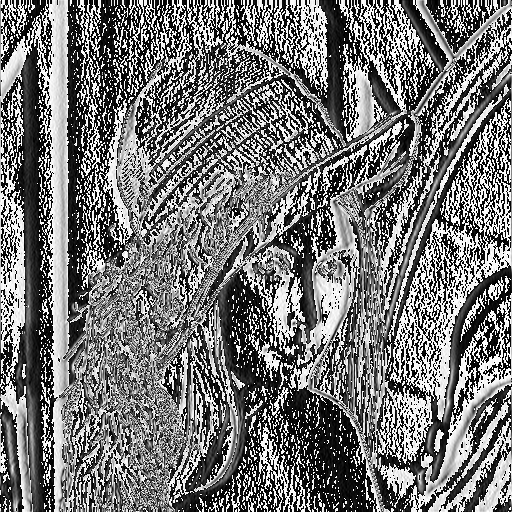

In [80]:
Image.fromarray(outputs.astype('uint8'))

In [89]:
img = Image.open('./data/test/lena.png')
imgA = np.array(img)

importlib.reload(utils)
filters = utils.Pic_Filters()
unsharpF = filters.unsharp_mask_filter(7, varience=2.)
outputs = filters.conv(unsharpF, imgA)
Image.fromarray(outputs.astype('uint8')).save('./data/result/problem2/unsharp/lena_k7.png')

hii


In [ ]:
Image.fromarray(outputs.astype('uint8'))

# problem 3 

In [119]:
img = Image.open('./data/test/baboon.png')
imgA = np.array(img)

importlib.reload(utils)
filters = utils.Pic_Filters()
F = filters.filterP3(2)

hii


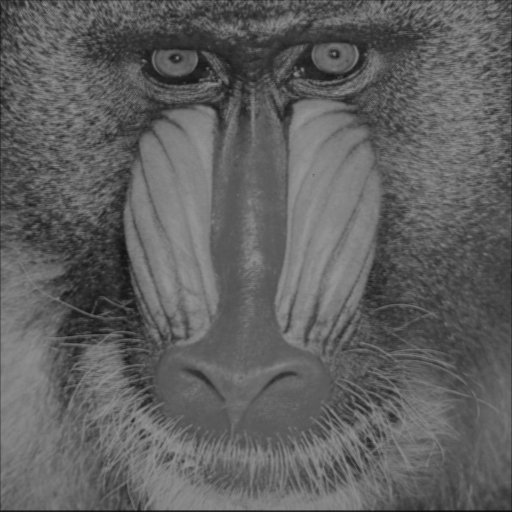

In [120]:
outputs = filters.conv(F, imgA)
Image.fromarray(outputs.astype('uint8'))

# problem 4

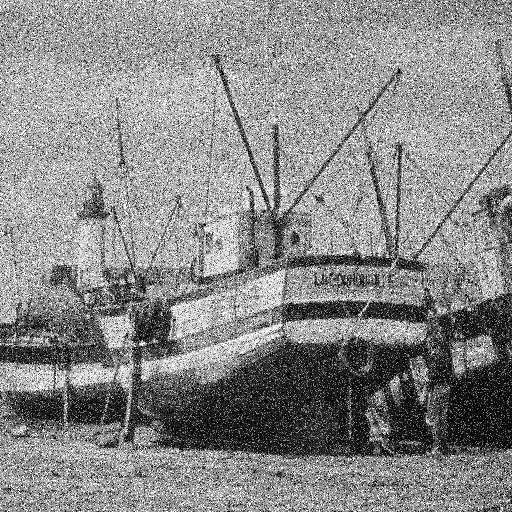

In [122]:
img = Image.open('./data/test/Noisy.png')
imgA = np.array(img)
img

In [123]:
importlib.reload(utils)
filters = utils.Pic_Filters()

hii


In [126]:
outputs = filters.order_stat_filt(imgA, size=7, mode='max')
Image.fromarray(outputs.astype('uint8')).save('./data/result/problem4/max.png')

# problem 5

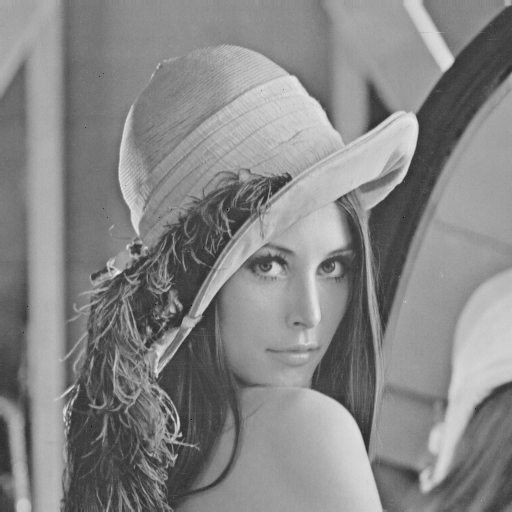

In [2]:
img = Image.open('./data/test/lena.png')
imgA = np.array(img)
img

In [39]:
importlib.reload(utils)
filters = utils.Pic_Filters()

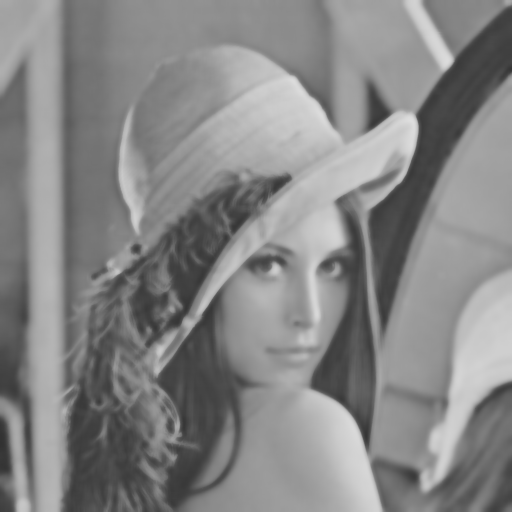

In [40]:
outputs = filters.bila_filt(imgA, size=7, sigC=16, sigS=8)
Image.fromarray(outputs.astype('uint8'))

# problem 6

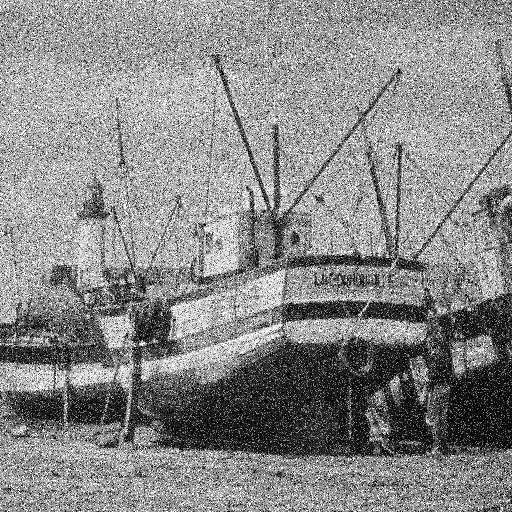

In [27]:
img = Image.open('./data/test/Noisy.png')
imgA = np.array(img)
img

In [32]:
importlib.reload(utils)
filters = utils.Pic_Filters()

In [33]:
outputs = filters.non_local_mean_filt(imgA,  Bratio=10, Sratio=1, sigma=10)
Image.fromarray(outputs.astype('uint8'))

AttributeError: 'int' object has no attribute 'astype'

# problem 7

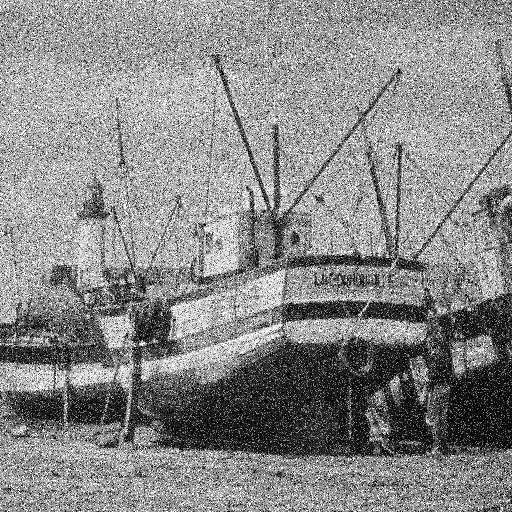

In [127]:
img = Image.open('./data/test/Noisy.png')
imgA = np.array(img)
img

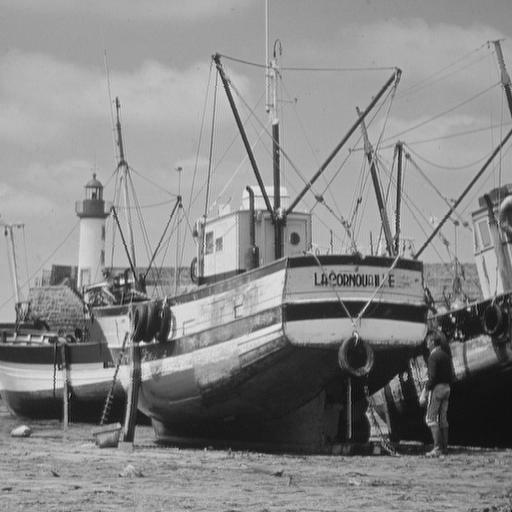

In [128]:
img2 = Image.open('./data/1.jpg')
imgA2 = np.array(img2)
img2

In [135]:
importlib.reload(utils)
filters = utils.Pic_Filters()

hii


(512, 512)


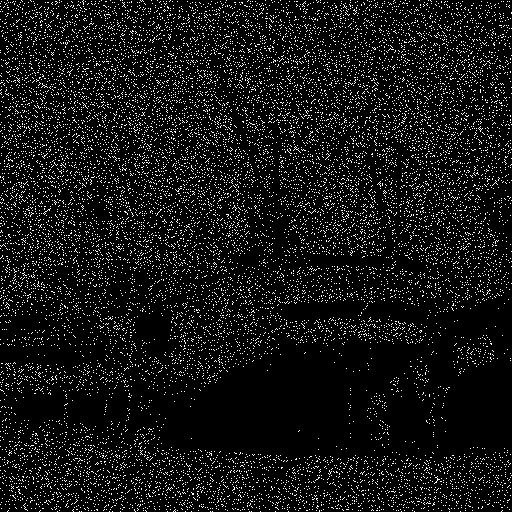

In [147]:
outputs = filters.non_local_mean_filt_imp(imgA,  Bratio=10, Sratio=1, sigma=0.5, alpha=0.6)
print(outputs.shape)
Image.fromarray(outputs.astype('uint8'))

In [146]:
Image.fromarray(outputs.astype('uint8')).save('./data/result/problem4_5_6/noisymap.png')

# try

In [10]:
image = imgA
bigWindowSize, smallWindowSize, h  = 50, 10, 5
padwidth = bigWindowSize//2
# The next few lines creates a padded image that reflects the border so that the big window can be accomodated through the loop
paddedImage = np.zeros((image.shape[0] + bigWindowSize,image.shape[1] + bigWindowSize))
paddedImage = paddedImage.astype(np.uint8)
paddedImage[padwidth:padwidth+image.shape[0], padwidth:padwidth+image.shape[1]] = image
paddedImage[padwidth:padwidth+image.shape[0], 0:padwidth] = np.fliplr(image[:,0:padwidth])
paddedImage[padwidth:padwidth+image.shape[0], image.shape[1]+padwidth:image.shape[1]+2*padwidth] = np.fliplr(image[:,image.shape[1]-padwidth:image.shape[1]])
paddedImage[0:padwidth,:] = np.flipud(paddedImage[padwidth:2*padwidth,:])
paddedImage[padwidth+image.shape[0]:2*padwidth+image.shape[0], :] =np.flipud(paddedImage[paddedImage.shape[0] - 2*padwidth:paddedImage.shape[0] - padwidth,:])

# iterator = 0
# totalIterations = image.shape[1]*image.shape[0]*(bigWindowSize - smallWindowSize)**2
# outputImage = paddedImage.copy()
# smallhalfwidth = smallWindowSize//2

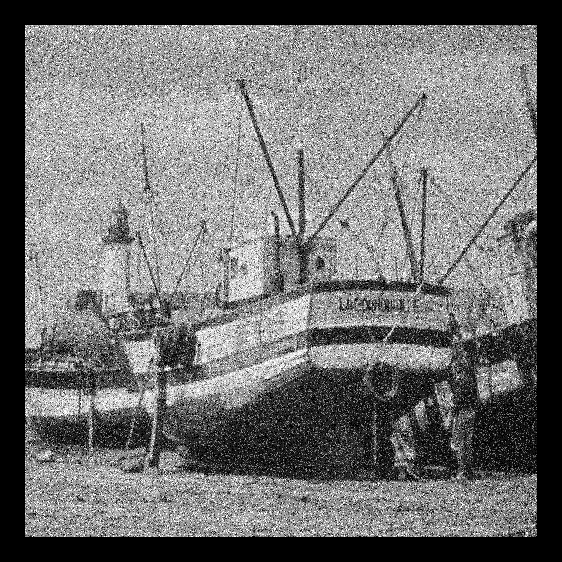

In [26]:
Image.fromarray(paddedImage.astype('uint8'))

In [10]:
for imageX in range(padwidth, padwidth + image.shape[1]):
    for imageY in range(padwidth, padwidth + image.shape[0]): 
        bWinX = imageX - padwidth
        bWinY = imageY - padwidth
        
        compNbhd = paddedImage[imageY - smallhalfwidth:imageY + smallhalfwidth + 1,imageX-smallhalfwidth:imageX+smallhalfwidth + 1]
        
        pixelColor = 0
        totalWeight = 0
        
        # For each comparison neighbourhood, search for all small windows within a large box, and compute their weights
        for sWinX in range(bWinX, bWinX + bigWindowSize - smallWindowSize, 1):
            for sWinY in range(bWinY, bWinY + bigWindowSize - smallWindowSize, 1):   
                #find the small box       
                smallNbhd = paddedImage[sWinY:sWinY+smallWindowSize + 1,sWinX:sWinX+smallWindowSize + 1]
                euclideanDistance = np.sqrt(np.sum(np.square(smallNbhd - compNbhd)))
                #weight is computed as a weighted softmax over the euclidean distances
                weight = np.exp(-euclideanDistance/h)
                totalWeight += weight
                pixelColor += weight*paddedImage[sWinY + smallhalfwidth, sWinX + smallhalfwidth]
                iterator += 1

pixelColor /= totalWeight
outputImage[imageY, imageX] = pixelColor

#   return outputImage[padwidth:padwidth+image.shape[0],padwidth:padwidth+image.shape[1]]

KeyboardInterrupt: 

In [6]:
totalIterations

419430400

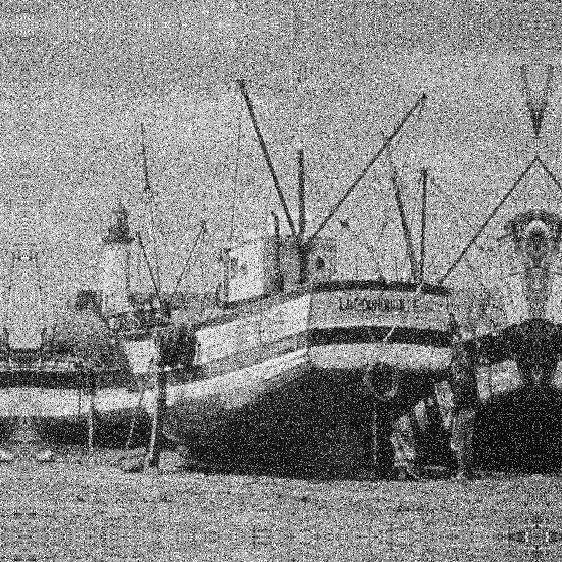

In [4]:
Image.fromarray(paddedImage)